# Praproses Pemodelan GARCH

In [1]:
!pip install arch

In [2]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("/content/Data Praproses GARCH.xlsx")
data = data.loc[:, ['Tanggal', 'Boxcox', 'Diff']]
data['Diff'] = data['Diff']/100
data['DiffA'] = data['Diff']*100

print(data.head())
print(data.shape)

     Tanggal    Boxcox      Diff     DiffA
0 2023-01-01  0.836424       NaN       NaN
1 2023-01-02  0.834165 -0.070833 -7.083333
2 2023-01-03  0.832535 -0.037500 -3.750000
3 2023-01-04  0.832163 -0.007428 -0.742754
4 2023-01-05  0.830957 -0.021739 -2.173913
(851, 4)


In [5]:
print(data.tail())

       Tanggal    Boxcox      Diff     DiffA
846 2025-04-26  0.821614  0.000000  0.000000
847 2025-04-27  0.821614  0.000000  0.000000
848 2025-04-28  0.823829  0.016667  1.666667
849 2025-04-29  0.821614 -0.016667 -1.666667
850 2025-04-30  0.809268 -0.058333 -5.833333


## Splitting Data

In [6]:
train_size = 731
test_size = 120

train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))

Jumlah data latih: 731
Jumlah data uji: 120


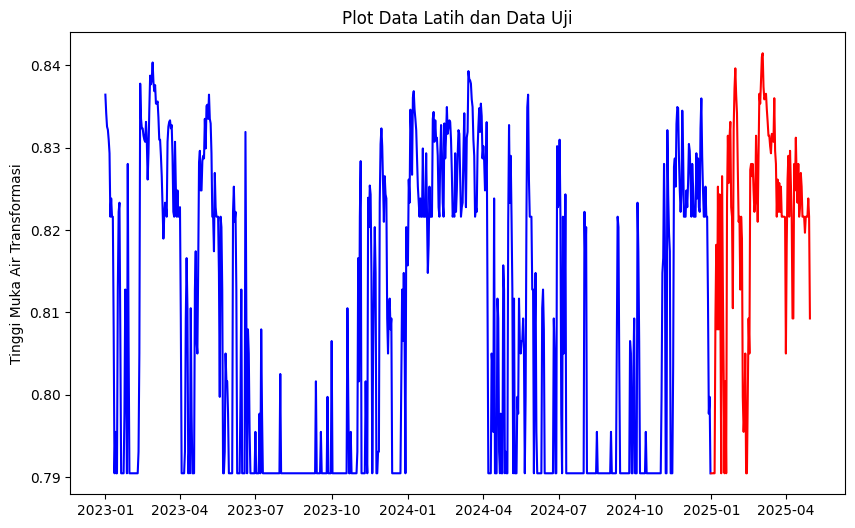

In [7]:
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Boxcox'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Boxcox'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Tinggi Muka Air Transformasi')
# plt.legend()
plt.show()

Jumlah data latih: 731
Jumlah data uji: 120


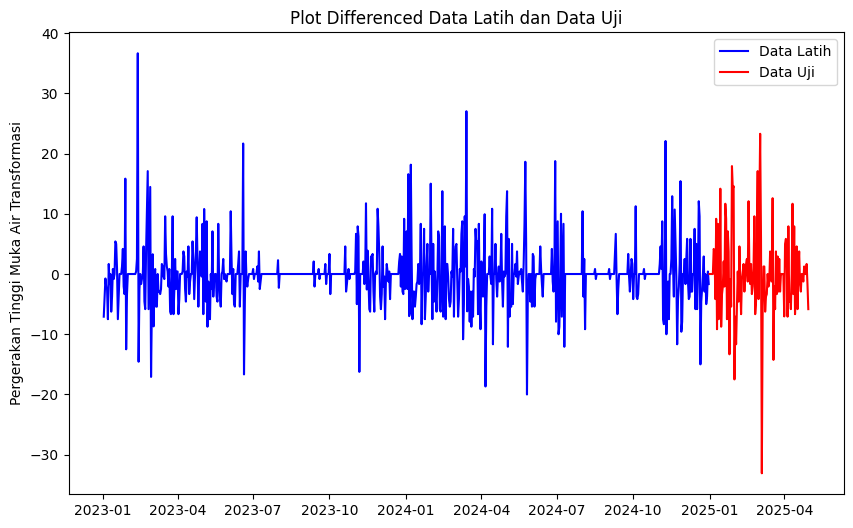

In [8]:
# Plot Differenced Data Latih dan Data Uji

print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))

# Plot the differenced training and testing data
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['DiffA'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['DiffA'], label='Data Uji', color='red')
plt.title('Plot Differenced Data Latih dan Data Uji')
plt.ylabel('Pergerakan Tinggi Muka Air Transformasi')
plt.legend()
plt.show()

In [9]:
data_diff = data['Diff'][1:]

train_data_diff = data_diff.iloc[:-test_size]
test_data_diff = data_diff.iloc[-test_size:]

print(train_data_diff.head())
print(train_data_diff.shape)

print(test_data_diff.head())
print(test_data_diff.shape)

1   -0.070833
2   -0.037500
3   -0.007428
4   -0.021739
5   -0.025000
Name: Diff, dtype: float64
(730,)
731    0.0
732    0.0
733    0.0
734    0.0
735    0.0
Name: Diff, dtype: float64
(120,)


# Pengujian Efek ARCH (ARCH-LM Test)

In [10]:
train_data_diff

,Diff
1,-0.070833
2,-0.037500
3,-0.007428
4,-0.021739
5,-0.025000
...,...
726,0.000000
727,-0.050000
728,-0.037500
729,0.004167


In [11]:
from arch.unitroot import ADF
from arch.__future__ import reindexing
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
import numpy as np

# Misalnya train_diff adalah array atau Series dari data differenced

import statsmodels.api as sm

for i in range(1, 21):
    # het_arch mengembalikan nilai: (LM stat, p-value, F stat, F p-value)
    lm_stat, lm_pvalue, f_stat, f_pvalue = het_arch(train_data_diff, maxlag=i)
    print(f"P Value LM Test lag ke {i} adalah {lm_pvalue}")

P Value LM Test lag ke 1 adalah 1.648225284429545e-05
P Value LM Test lag ke 2 adalah 7.640180808681128e-05
P Value LM Test lag ke 3 adalah 0.00021846437219954966
P Value LM Test lag ke 4 adalah 0.00032245216998292914
P Value LM Test lag ke 5 adalah 0.0007277161612093342
P Value LM Test lag ke 6 adalah 0.0016184730055915108
P Value LM Test lag ke 7 adalah 0.003339446363244853
P Value LM Test lag ke 8 adalah 0.005781398544685254
P Value LM Test lag ke 9 adalah 0.009199375420560305
P Value LM Test lag ke 10 adalah 0.01544534050013187
P Value LM Test lag ke 11 adalah 0.01733735192862998
P Value LM Test lag ke 12 adalah 0.013895848079897162
P Value LM Test lag ke 13 adalah 0.013740278784894488
P Value LM Test lag ke 14 adalah 0.012474921167669753
P Value LM Test lag ke 15 adalah 0.000376495392387006
P Value LM Test lag ke 16 adalah 0.0004852035325741642
P Value LM Test lag ke 17 adalah 0.0007791051449104675
P Value LM Test lag ke 18 adalah 0.0012715435318971444
P Value LM Test lag ke 19 ad

<ipython-input-11-5e34ebf115e5>:13: FutureWarning: the 'maxlag' keyword is deprecated, use 'nlags' instead.
  lm_stat, lm_pvalue, f_stat, f_pvalue = het_arch(train_data_diff, maxlag=i)


**Interpretasi:**
Hasil uji ARCH-LM yang disajikan menunjukkan *p-value* yang **lebih kecil** daripada taraf nyata 5% pada lag ke-1 hingga lag ke-20. Hal ini memenuhi syarat penolakan terhadap hipotesis nol sehingga dapat disimpulkan bahwa terdapat pengaruh **efek ARCH** yang mengindikasikan adanya keheterogenan ragam pada data hingga lag ke-20 dalam taraf nyata 5%.

> !!! Data yang terindikasi memiliki keheterogenan ragam hingga lebih dari lag ke-12 lebih cocok dimodelkan menggunakan model GARCH dibanding model ARCH.

# Pemodelan GARCH

Pemodelan ARCH/GARCH dilakukan dengan mencoba beberapa model dari GARCH(1,1), GARCH(2,1), GARCH(1,2), GARCH(2,2)

## GARCH(1,1)

In [12]:
from arch import arch_model

model11 = arch_model(train_data_diff, mean='AR', lags=(1,2), vol='GARCH', p=1, q=1, o=0, rescale=False)

# Estimasi model
results11 = model11.fit(disp='off')

# Tampilkan hasil estimasi
print(results11.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   Diff   R-squared:                       0.044
Mean Model:                        AR   Adj. R-squared:                  0.041
Vol Model:                      GARCH   Log-Likelihood:                1233.21
Distribution:                  Normal   AIC:                          -2454.42
Method:            Maximum Likelihood   BIC:                          -2426.88
                                        No. Observations:                  728
Date:                Thu, May 15 2025   Df Residuals:                      725
Time:                        08:44:46   Df Model:                            3
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      1.5894e-03  1.063e-03      1.495      0.135 

## GARCH(2,1)

In [13]:
from arch import arch_model

model21 = arch_model(train_data_diff, mean='AR', lags=(1,2), vol='GARCH', p=2, q=1, o=0, rescale=False)

# Estimasi model
results21 = model21.fit(disp='off')

# Tampilkan hasil estimasi
print(results21.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   Diff   R-squared:                       0.044
Mean Model:                        AR   Adj. R-squared:                  0.042
Vol Model:                      GARCH   Log-Likelihood:                1230.90
Distribution:                  Normal   AIC:                          -2447.80
Method:            Maximum Likelihood   BIC:                          -2415.67
                                        No. Observations:                  728
Date:                Thu, May 15 2025   Df Residuals:                      725
Time:                        08:44:47   Df Model:                            3
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      1.7885e-03  1.118e-03      1.599      0.110 

## GARCH(1,2)

In [14]:
from arch import arch_model

model12 = arch_model(train_data_diff, mean='AR', lags=(1,2), vol='GARCH', p=1, q=2, o=0, rescale=False)

# Estimasi model
results12 = model12.fit(disp='off')

# Tampilkan hasil estimasi
print(results12.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   Diff   R-squared:                       0.045
Mean Model:                        AR   Adj. R-squared:                  0.043
Vol Model:                      GARCH   Log-Likelihood:                1234.32
Distribution:                  Normal   AIC:                          -2454.64
Method:            Maximum Likelihood   BIC:                          -2422.51
                                        No. Observations:                  728
Date:                Thu, May 15 2025   Df Residuals:                      725
Time:                        08:44:47   Df Model:                            3
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      1.4989e-03  1.120e-03      1.339      0.181 

## GARCH(2,2)

In [15]:
from arch import arch_model

model22 = arch_model(train_data_diff, mean='AR', lags=(1,2), vol='GARCH', p=2, q=2, o=0, rescale=False)

# Estimasi model
results22 = model22.fit(disp='off')

# Tampilkan hasil estimasi
print(results22.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                   Diff   R-squared:                       0.045
Mean Model:                        AR   Adj. R-squared:                  0.043
Vol Model:                      GARCH   Log-Likelihood:                1232.36
Distribution:                  Normal   AIC:                          -2448.71
Method:            Maximum Likelihood   BIC:                          -2411.99
                                        No. Observations:                  728
Date:                Thu, May 15 2025   Df Residuals:                      725
Time:                        08:44:47   Df Model:                            3
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      1.4770e-03  1.095e-03      1.349      0.177 

## Tabel: Dugaan Nilai Parameter Model GARCH

In [16]:
import pandas as pd

model_results = {
    'GARCH(1,1)': results11,
    'GARCH(2,1)': results21,
    'GARCH(1,2)': results12,
    'GARCH(2,2)': results22,
}

data = []
for model_name, result in model_results.items():
  params = result.params
  pvalues = result.pvalues
  aic = result.aic

  # Extract relevant parameters (adjust as needed based on model summary)
  param_names = list(params.index)

  for param_name in param_names:
      data.append([model_name, param_name, params[param_name], pvalues[param_name], aic])


df_garch = pd.DataFrame(data, columns=['Model', 'Parameter', 'Koefisien Parameter', 'P-Value', 'AIC'])
df_garch


,Model,Parameter,Koefisien Parameter,P-Value,AIC
0,"GARCH(1,1)",Const,0.001589,1.348065e-01,-2454.420134
1,"GARCH(1,1)",Diff[1],-0.114817,1.711496e-01,-2454.420134
2,"GARCH(1,1)",Diff[2],-0.154365,2.964643e-02,-2454.420134
3,"GARCH(1,1)",omega,0.000041,3.304832e-01,-2454.420134
4,"GARCH(1,1)",alpha[1],0.086137,1.144155e-02,-2454.420134
5,"GARCH(1,1)",beta[1],0.899028,3.627398e-124,-2454.420134
6,"GARCH(2,1)",Const,0.001788,1.097231e-01,-2447.800913
7,"GARCH(2,1)",Diff[1],-0.128091,2.311941e-01,-2447.800913
8,"GARCH(2,1)",Diff[2],-0.170097,2.409448e-02,-2447.800913
9,"GARCH(2,1)",omega,0.000039,6.022042e-01,-2447.800913


In [17]:
# Create a new DataFrame to store the results
garch_summary = pd.DataFrame(columns=['Model', 'Parameter', 'Koefisien Parameter', 'P-Value', 'Signifikansi', 'AIC'])

# Function to determine significance
def significance(p_value):
    if p_value < 0.05:
        return 'Signifikan'
    else:
        return 'Tidak Signifikan'

# Iterate through the models and extract information
for model_name, result in model_results.items():
    params = result.params
    pvalues = result.pvalues
    aic = result.aic

    for param_name in params.index:
        garch_summary = pd.concat([garch_summary, pd.DataFrame({
            'Model': [model_name],
            'Parameter': [param_name],
            'Koefisien Parameter': [params[param_name]],
            'P-Value': [pvalues[param_name]],
            'Signifikansi': [significance(pvalues[param_name])],
            'AIC': [aic]
        })], ignore_index=True)

# Display the summary table
garch_summary


<ipython-input-17-1b1012bb346a>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  garch_summary = pd.concat([garch_summary, pd.DataFrame({


,Model,Parameter,Koefisien Parameter,P-Value,Signifikansi,AIC
0,"GARCH(1,1)",Const,0.001589,1.348065e-01,Tidak Signifikan,-2454.420134
1,"GARCH(1,1)",Diff[1],-0.114817,1.711496e-01,Tidak Signifikan,-2454.420134
2,"GARCH(1,1)",Diff[2],-0.154365,2.964643e-02,Signifikan,-2454.420134
3,"GARCH(1,1)",omega,0.000041,3.304832e-01,Tidak Signifikan,-2454.420134
4,"GARCH(1,1)",alpha[1],0.086137,1.144155e-02,Signifikan,-2454.420134
5,"GARCH(1,1)",beta[1],0.899028,3.627398e-124,Signifikan,-2454.420134
6,"GARCH(2,1)",Const,0.001788,1.097231e-01,Tidak Signifikan,-2447.800913
7,"GARCH(2,1)",Diff[1],-0.128091,2.311941e-01,Tidak Signifikan,-2447.800913
8,"GARCH(2,1)",Diff[2],-0.170097,2.409448e-02,Signifikan,-2447.800913
9,"GARCH(2,1)",omega,0.000039,6.022042e-01,Tidak Signifikan,-2447.800913


## Resume Model Terbaik GARCH

- GARCH(1,1): 2/4 dugaan parameter yang signifikan ( AIC = -2454.420134 ) ***
- GARCH(2,1): 1/5 dugaan parameter yang signifikan ( AIC = -2447.800913 )
- GARCH(1,2): 1/5 dugaan parameter yang signifikan ( AIC = -2454.640892 )
- GARCH(2,2): 1/6 dugaan parameter yang signifikan ( AIC = -2448.710888 )

# Pendugaan Parameter Model GARCH

## Best Model: GARCH(1,1) || AIC = -2454.420134

In [18]:
from arch import arch_model
import pandas as pd

# Specify the GARCH(1,1) model
model_garch11_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=1, q=1)

# Fit the model
result_garch11_diff = model_garch11_diff.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 185613932.78721276
Iteration:      2,   Func. Count:     18,   Neg. LLF: 45600.76373875301
Iteration:      3,   Func. Count:     25,   Neg. LLF: -1213.5718475798935
Iteration:      4,   Func. Count:     31,   Neg. LLF: -1224.773860046099
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1224.773853992132
            Iterations: 8
            Function evaluations: 31
            Gradient evaluations: 4


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002493. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [19]:
# Display model fitting summary
print(result_garch11_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1224.77
Distribution:                  Normal   AIC:                          -2441.55
Method:            Maximum Likelihood   BIC:                          -2423.18
                                        No. Observations:                  730
Date:                Thu, May 15 2025   Df Residuals:                      729
Time:                        08:44:47   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.6418e-03  1.150e-03      1.427      0.154 

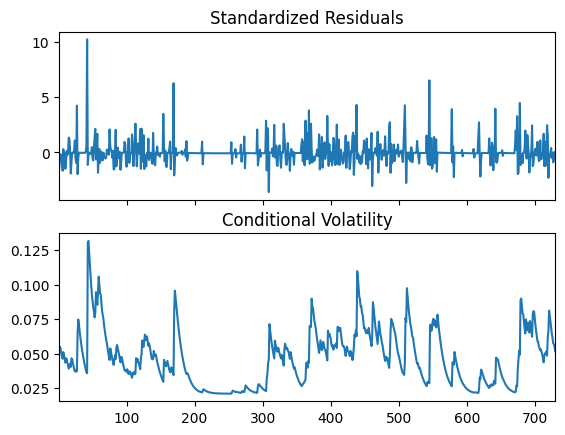

In [20]:
fig = result_garch11_diff.plot()

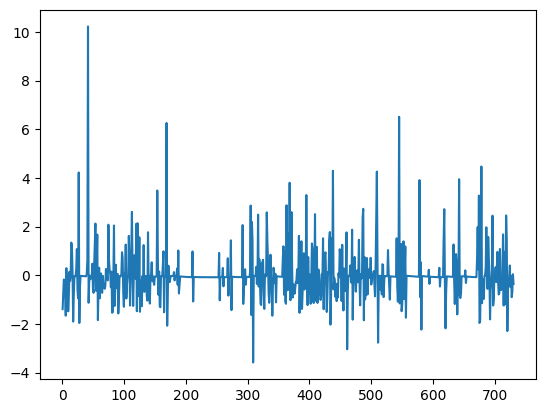

In [21]:
garch_stresidual = result_garch11_diff.resid / result_garch11_diff.conditional_volatility
plt.plot(garch_stresidual)

## Uji Diagnostik Sisaan

### Diagnostik Sisaan Model GARCH: Uji Kehomogenan Sisaan (ARCH-LM Test)

In [22]:
from statsmodels.stats.diagnostic import het_arch

lm_stat, lm_pvalue, f_stat, f_pvalue = het_arch(garch_stresidual, nlags=20)

# Tampilkan hasil
print(f"ARCH LM Stat: {lm_stat:.4f}, p-value: {lm_pvalue:.4f}")
print(f"F Stat: {f_stat:.4f}, p-value: {f_pvalue:.4f}")

ARCH LM Stat: 14.9525, p-value: 0.7791
F Stat: 0.7411, p-value: 0.7846


**Interpretasi:** Berdasarkan uji kehomogenan sisaan (ARCH-LM Test), diperoleh p-value sebesar 0.7791 yang lebih besar dari taraf nyata 5% sehingga tak tolak  H0 .

### Diagnostik Sisaan Model GARCH: Uji Kebebasan Sisaan (Ljung-Box Test)

#### Pengujian Hipotesis

##### $H_0$: Sisaan saling bebas
##### $H_1$: Sisaan tidak saling bebas

In [23]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), lags=[10], return_df=True)
print(result_df)

      lb_stat     lb_pvalue
10  49.747412  2.970247e-07


**Interpretasi:**
Berdasarkan uji kebebasan sisaan (Ljung-Box Test), diperoleh *p-value* sebesar 2.970247e-07 yang kurang dari taraf nyata 5% sehingga *tolak $H_0$*.

### Diagnostik Sisaan Model GARCH: Uji Normalitas Sisaan (Kolmogorov-Smirnov Test)

#### Pengujian Hipotesis

##### $H_0$: Sisaan menyebar normal
##### $H_1$: Sisaan tidak menyebar normal

In [24]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

9.124149895226424e-39


**Interpretasi:**
Berdasarkan uji normalitas sisaan (KS Test), diperoleh *p-value* sebesar 9.124149895226424e-39 yang kurang dari taraf nyata 5% sehingga *tolak $H_0$*.

### Diagnostik Sisaan Model GARCH: Uji Nilai Harapan Sisaan (t-Test)

#### Pengujian Hipotesis

##### $H_0$: Nilai harapan sisaan sama dengan nol
##### $H_1$: Nilai harapan sisaan tidak sama dengan nol

In [25]:
result_harapan = stats.ttest_1samp(garch_stresidual, 0)
print(result_harapan.pvalue)

0.8018496032792409


**Interpretasi:**
Berdasarkan uji nilai harapan sisaan nol (t-test), diperoleh *p-value* sebesar 0.8018496032792409 yang lebih besar dari taraf nyata 5% sehingga *tak tolak $H_0$*.

## Data Sisaan Model GARCH

In [26]:
garch_stresidual.to_excel("garch_stresidual.xlsx", index=False)

# Prediksi

Pendugaan nilai amatan menggunakan model GARCH(1,1) dilakukan pada data latih dan uji untuk menghitung nilai keakuratan model.

In [27]:
np.random.seed(42)
epsilon_train = np.random.normal(0, 1, 730)

### Prediksi pada Data Latih (Train Data)

In [28]:
predicted_train = result_garch11_diff.conditional_volatility * epsilon_train + 0.0016418
predicted_train

,cond_vol
1,0.027556
2,-0.005974
3,0.036272
4,0.078312
5,-0.009612
...,...
726,-0.009638
727,0.002701
728,0.021379
729,-0.028034


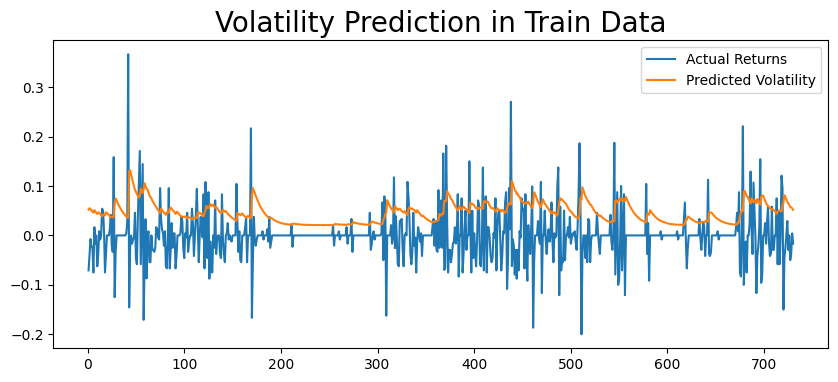

In [29]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(result_garch11_diff.conditional_volatility)
plt.title('Volatility Prediction in Train Data', fontsize = 20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize = 10)

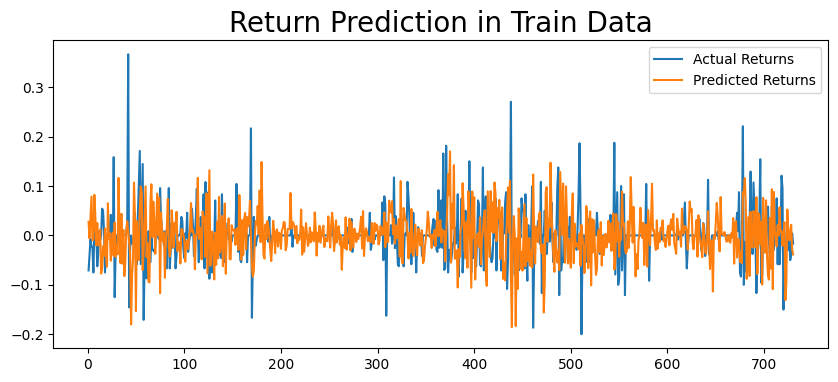

In [30]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(predicted_train)
plt.title('Return Prediction in Train Data', fontsize = 20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize = 10)

#### Hasil Prediksi (Data Latih)

In [31]:
predicted_train.to_excel("predicted_train.xlsx", index=False)

In [32]:
predicted_train

,cond_vol
1,0.027556
2,-0.005974
3,0.036272
4,0.078312
5,-0.009612
...,...
726,-0.009638
727,0.002701
728,0.021379
729,-0.028034


### Prediksi pada Data Uji (Test Data)

In [33]:
condvar_test = []

for i in range(test_size):
    train = data_diff[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002493. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002489. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

In [34]:
condvar_test

[0.04897562089257368,
 0.04693610601516044,
 0.04467586391321176,
 0.042494216002702485,
 0.03991389773719733,
 0.03861047489203399,
 0.03902105371366871,
 0.03896399835172408,
 0.03965104827808717,
 0.04960115481926136,
 0.053822439254211984,
 0.057167897588111756,
 0.05992726384535498,
 0.058016692400329896,
 0.07055582326572256,
 0.07229431630440879,
 0.06907562388531897,
 0.06556729581915956,
 0.06279536861463676,
 0.05921279275425177,
 0.07018745460479302,
 0.06945497619234489,
 0.0696656042281433,
 0.06928885909816067,
 0.06713855682421664,
 0.07584181971392544,
 0.07156869757970225,
 0.06978103106133515,
 0.08657762506573385,
 0.09281774550389216,
 0.09854792412831595,
 0.10830478458205957,
 0.10441014605932664,
 0.10717815894946636,
 0.10044753778444833,
 0.09450188289848482,
 0.09125818136084737,
 0.08608437532678044,
 0.08772843530865822,
 0.07959123613878571,
 0.07508340392274336,
 0.07081700303489569,
 0.0662073034567509,
 0.06401528521634817,
 0.06049669802372615,
 0.05740

In [35]:
condvar_test = pd.Series(condvar_test, index=data_diff.index[-120:])
print(condvar_test)

731    0.048976
732    0.046936
733    0.044676
734    0.042494
735    0.039914
         ...   
846    0.040769
847    0.039014
848    0.037379
849    0.036194
850    0.033725
Length: 120, dtype: float64


In [36]:
np.random.seed(42)
epsilon_test = np.random.normal(0, 1, 120)

In [37]:
predicted_test = condvar_test * epsilon_test + 0.0016418
predicted_test

,0
731,0.025969
732,-0.004848
733,0.030578
734,0.066362
735,-0.007704
...,...
846,0.013936
847,0.000288
848,-0.042042
849,0.043005


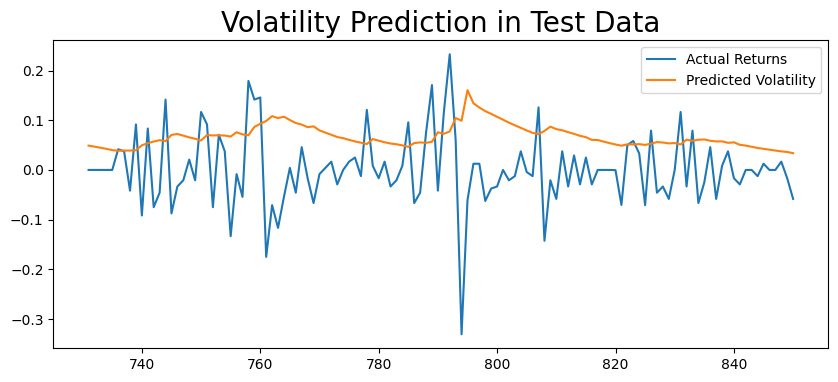

In [38]:
plt.figure(figsize=(10,4))
true, = plt.plot(test_data['Diff'])
preds, = plt.plot(condvar_test)
plt.title('Volatility Prediction in Test Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

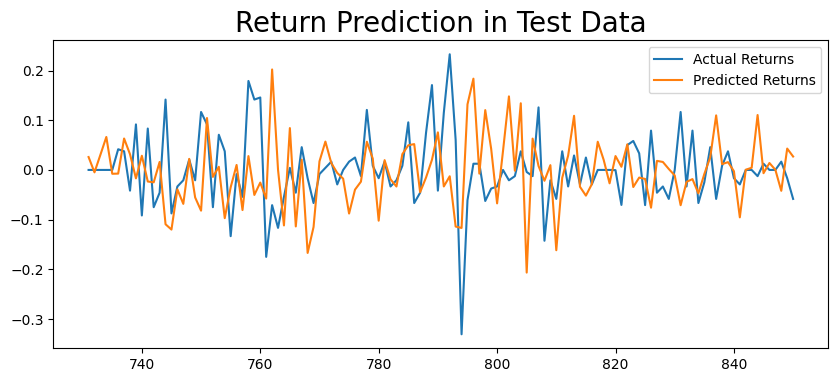

In [39]:
plt.figure(figsize=(10,4))
true, = plt.plot(data_diff[-120:])
preds, = plt.plot(predicted_test)
plt.title('Return Prediction in Test Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

#### Hasil Prediksi (Data Uji)

In [40]:
predicted_test.to_excel("predicted_test.xlsx", index=False)

## Peramalan

Peramalan (forecasting) terhadap data dilakukan hingga 120 periode ke depan.


In [41]:
from datetime import datetime, timedelta

data_diff.index = pd.to_datetime(data_diff.index)

pred = result_garch11_diff.forecast(horizon=120)
future_dates = [data_diff.index[-1] + timedelta(days=i) for i in range(1,121)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 120 Days')

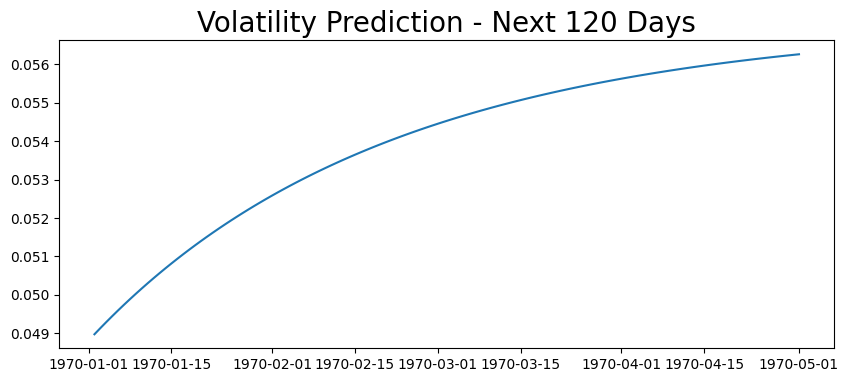

In [42]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 120 Days', fontsize=20)

In [43]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 120)

In [44]:
predicted_forecast = condvar_forecast * epsilon_forecast + 0.0016418
predicted_forecast

,0
1970-01-02 00:00:00.000000850,0.025969
1970-01-03 00:00:00.000000850,-0.005152
1970-01-04 00:00:00.000000850,0.033569
1970-01-05 00:00:00.000000850,0.076952
1970-01-06 00:00:00.000000850,-0.009972
...,...
1970-04-27 00:00:00.000000850,0.018588
1970-04-28 00:00:00.000000850,-0.000310
1970-04-29 00:00:00.000000850,-0.064074
1970-04-30 00:00:00.000000850,0.065923


Text(0.5, 1.0, 'Return Forecast - Next 120 Days')

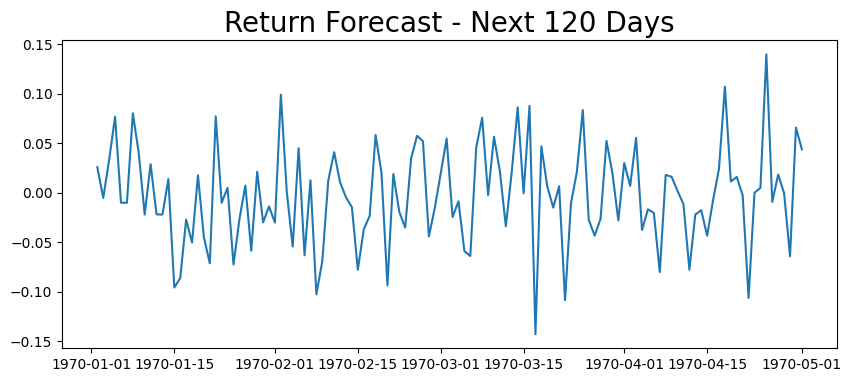

In [45]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 120 Days', fontsize=20)

In [46]:
predicted_forecast.to_excel("forecasted_return_120.xlsx", index=False)